# Project: Investigate a Dataset - European Soccer (2008-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches,players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive, and we encourage you to read more about it [here](https://www.kaggle.com/datasets/hugomathien/soccer?datasetId=63&sortBy=dateCreated&language=Python=True).

### Questions for Analysis

> 1. Who were the top 5 best players before 2013?
2. What are the attributes of the lowest overall rated player? 
3. Which league has the highest home goals from 2010 to 2016?
4. How are team attributes correlated to one another?
5. Which player foot has the highest average freekick accuracyand shot power?

# Importing Data

Importing the necessary packages required for my analysis. 

In [66]:
# #importing the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section I hav loaded the required csv files from `Database_Soccer` database and checked for required data format and changes that i need to carry out to make the datasets cleand for better performance for my analysis

### Loading Data

In [67]:
# Loaded data from Database_soccer database 

df_match = pd.read_csv('Match.csv')
df_league = pd.read_csv('League.csv')
df_country = pd.read_csv('Country.csv')
df_player = pd.read_csv('Player.csv')
df_team = pd.read_csv('Team.csv')
df_team_att = pd.read_csv('Team_Attributes.csv')
df_player_att = pd.read_csv('Player_Attributes.csv')

#### Check the info shapes of all dataframes

1. Match Dataframe

In [68]:
#view the head of the dataframe
df_match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [69]:
# shape of the dataframe
df_match.shape

(25979, 115)

In [70]:
# Check for null values
# checking the info won't display the details required. so we willl use the .isnull() functon
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

Null values seems to be much. i will look into it while cleaning the dataset 

In [71]:
# checking for duplicate rows
df_match.duplicated().sum()

0

2. League Dataframe

In [72]:
#view the head of the dataframe
df_league.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [73]:
df_league.shape

(11, 3)

In [74]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


3. Country Dataframe

In [75]:
#view the head of the dataframe
df_country.head(2)

,id,name
0,1,Belgium
1,1729,England


In [76]:
df_country.shape

(11, 2)

In [77]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


4. Player Dataframe

In [78]:
#view the head of the dataframe
df_player.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [79]:
df_player.shape

(11060, 7)

In [80]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


The birthday column data type from above result need to be changed from string to datatime data type

In [81]:
# checking for duplicate rows
df_player.duplicated().sum()

0

5. Team Dataframe

In [82]:
#view the head of the dataframe
df_team.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [83]:
df_team.shape

(299, 5)

In [84]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Team_fifa_api_id has null values and the data type needs to be converted to int

In [85]:
# checking for duplicate rows
df_team.duplicated().sum()

0

6. Team Attributes Dataframe

In [86]:
#view the head of the dataframe
df_team_att.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [87]:
df_team_att.shape

(1458, 25)

In [88]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

above indicates that a column has large null values. this would be look into durng data clealing

In [89]:
# checking for duplicate rows
df_team_att.duplicated().sum()

0

7. Player Attributes Dataframe

In [90]:
#view the head of the dataframe
df_player_att.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [91]:
df_player_att.shape

(183978, 42)

In [92]:
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [93]:
df_player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

The null values here would be looked into

In [94]:
# checking for duplicate rows
df_player_att.duplicated().sum()

0


### Data Cleaning
 

Match Dataframe

Null values were much so we will be dropping all columns with null values

In [95]:
# drop columns with null values
df_match.dropna(axis = 1, inplace = True)

df_match.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [96]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [97]:
#changing the date column data type

df_match.date = pd.to_datetime(df_match.date)

Slipt the season column to two new columns for the start and end of the season year and drop the season column  

In [98]:
start_season = df_match.season.apply(lambda x : x.split('/')[0])

end_season = df_match.season.apply(lambda x : x.split('/')[1])

In [99]:
#assignig the column to the dataframe
df_match['start_season'] = start_season
df_match['end_season'] = end_season

In [100]:
#drooping season column from the dataframn

df_match.drop(columns = ['season'], axis  = 1, inplace = True)

In [101]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 12 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
stage               25979 non-null int64
date                25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
start_season        25979 non-null object
end_season          25979 non-null object
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 2.4+ MB


In [102]:
#change the start and end season column data type to int
df_match['start_season'] = df_match.start_season.astype('int')
df_match['end_season'] = df_match.end_season.astype('int')


In [103]:
df_match.head()

,id,country_id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,start_season,end_season
0,1,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009
1,2,1,1,1,2008-08-16,492474,10000,9994,0,0,2008,2009
2,3,1,1,1,2008-08-16,492475,9984,8635,0,3,2008,2009
3,4,1,1,1,2008-08-17,492476,9991,9998,5,0,2008,2009
4,5,1,1,1,2008-08-16,492477,7947,9985,1,3,2008,2009


In [104]:
#checking if country_id and league_id had the same values. 
df_match['league_id'].value_counts() == df_match['country_id'].value_counts()

21518    True
4769     True
1729     True
10257    True
13274    True
7809     True
17642    True
15722    True
19694    True
1        True
24558    True
dtype: bool

In [105]:
df_match.drop(columns=['country_id'], axis = 1, inplace = True)
df_match.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,start_season,end_season
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2009
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2009
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2009
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2009


Country and League dataframe

In [106]:
#Renaming id column for both dataframe to league_id
#Since they have the same values
df_country.rename(columns={'id' : 'league_id'}, inplace = True)

df_league.rename(columns={'id' : 'league_id'}, inplace = True)

#Renaming the name column for both country and league dataframe
# To country_name and league_name respectively
df_country.rename(columns={'name' : 'country_name'}, inplace = True)

df_league.rename(columns={'name' : 'league_name'}, inplace = True)


In [107]:
df_country.head()

,league_id,country_name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [108]:
df_league.head()

,league_id,country_id,league_name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [109]:
#droping country_id column
df_league.drop(columns = ['country_id'], axis = 1, inplace = True)

Merge League and Country dataframes together and name the new dataframe to be `df_coun_lea` 

In [110]:
df_coun_lea = df_country.merge(df_league, left_on = 'league_id',
                               right_on = 'league_id')

In [111]:
df_coun_lea.head()

,league_id,country_name,league_name
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A


Merge Match and coun_lea dataframes together and name the new dataframe to be `df_match_ed` 


In [112]:
df_match_ed = df_match.merge(df_coun_lea, left_on = 'league_id',
                          right_on = 'league_id' )

df_match_ed.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,start_season,end_season,country_name,league_name
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium,Belgium Jupiler League
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2009,Belgium,Belgium Jupiler League
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2009,Belgium,Belgium Jupiler League
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2009,Belgium,Belgium Jupiler League
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2009,Belgium,Belgium Jupiler League


In [113]:
df_match_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 13 columns):
id                  25979 non-null int64
league_id           25979 non-null int64
stage               25979 non-null int64
date                25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
start_season        25979 non-null int64
end_season          25979 non-null int64
country_name        25979 non-null object
league_name         25979 non-null object
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 2.8+ MB


Player Dataframe

In [114]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [115]:
#changing the birthday column data type

df_player.birthday  = pd.to_datetime(df_player.birthday)

In [116]:
#dropping player_fifa_api_id column

df_player.drop(columns = ['player_fifa_api_id'], 
               axis =  1, inplace = True)



Team Dataframe




In [117]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [118]:
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [119]:
#dropping null column
df_team.drop(columns = ['team_fifa_api_id'],inplace = True)

In [120]:
# Reanaming column 

df_team.rename(columns = {'team_long_name' : 'team_name'}, 
               inplace = True)

Player Attributes Dataframe

In [121]:
df_player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

 Dropping all rows involved with the null values.
 
 Changing the date column data type to the proper data type

In [122]:
# droping rows with null values
df_player_att.dropna(axis = 0, inplace = True)

In [123]:
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [124]:
#changing data type of Date column
df_player_att.date  = pd.to_datetime(df_player_att.date)

In [125]:
#dropping Id and player_fifa_api_id column


df_player_att.drop(columns = ['id', 'player_fifa_api_id'], 
                   axis =  1, inplace = True)

Merge the Player and Player attributes dataframes together

The new dataframe should be named `df_player_ed`

In [126]:
#Merging dataframes 
df_player_ed = df_player.merge(df_player_att, left_on = 'player_api_id', 
                              right_on = 'player_api_id')

df_player_ed.head()

,id,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-11-19,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-09-21,62.0,66.0,right,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-03-20,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2007-02-22,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Team attributes

In [127]:
df_team_att.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [128]:
#dropping column with the null values and team_fifa_api_id column
df_team_att.drop(columns= ['buildUpPlayDribbling','team_fifa_api_id'],
                 inplace = True)

In [129]:
#changing the date column data type


df_team_att.date = pd.to_datetime(df_team_att.date)

Merge Team and Team Attributes dataframe 

The new dataframe should be named `df_team_ed`

In [130]:
#Merging dataframes 
df_team_ed = df_team.merge(df_team_att, left_on = 'team_api_id', 
                              right_on = 'team_api_id')

df_team_ed.head()

,id_x,team_api_id,team_name,team_short_name,id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,KRC Genk,GEN,485,2010-02-22,45,Balanced,Little,45,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,KRC Genk,GEN,486,2011-02-22,66,Balanced,Little,52,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,KRC Genk,GEN,487,2012-02-22,53,Balanced,Little,55,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,KRC Genk,GEN,488,2013-09-20,58,Balanced,Little,38,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,KRC Genk,GEN,489,2014-09-19,58,Balanced,Normal,38,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [131]:
#dropping columns that are not needed

df_team_ed.drop(columns= ['id_x','id_y', 'team_short_name'],
                 inplace = True)

In [132]:
df_team_ed.head()

,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,2010-02-22,45,Balanced,Little,45,Mixed,Organised,50,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,2011-02-22,66,Balanced,Little,52,Mixed,Organised,65,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,2012-02-22,53,Balanced,Little,55,Mixed,Organised,55,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,2013-09-20,58,Balanced,Little,38,Mixed,Organised,67,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,KRC Genk,2014-09-19,58,Balanced,Normal,38,Mixed,Organised,67,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


<a id='eda'></a>
## Exploratory Data Analysis



###  1. Who were the top 5 best players before 2013?  


In [133]:
#sorting matxh dataframe by date in ascending order
df_player_ed = df_player_ed.sort_values('date', ascending= True)

#creating new table from 2010 to 2016 
df_2013 = df_player_ed.query('date < "2013-01-01"')

df_2013.tail()

,id,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
114667,7019,292461,Marwan Mohsen,1989-02-25,187.96,181,2012-08-31,64.0,70.0,right,...,49.0,67.0,17.0,17.0,16.0,11.0,11.0,10.0,14.0,12.0
31186,1908,169721,Connor Wickham,1993-03-31,187.96,198,2012-08-31,69.0,83.0,right,...,47.0,74.0,14.0,22.0,17.0,7.0,15.0,5.0,9.0,11.0
59433,3634,212416,Gael Bigirimana,1993-10-22,177.80,163,2012-08-31,60.0,76.0,right,...,69.0,42.0,40.0,54.0,52.0,6.0,14.0,9.0,11.0,11.0
161475,9893,278848,Stanley Elbers,1992-05-14,172.72,150,2012-08-31,63.0,72.0,left,...,53.0,46.0,26.0,29.0,24.0,11.0,6.0,13.0,11.0,13.0
125364,7650,128455,Mohamed Coulibaly,1988-08-07,177.80,154,2012-08-31,56.0,60.0,right,...,36.0,51.0,24.0,33.0,31.0,9.0,10.0,11.0,5.0,11.0


In [134]:
#Top 5 best overall Rated Players before 2013
be4_2013 = df_2013.groupby('player_name')['overall_rating'].mean(
                ).sort_values(ascending= False).astype('int')[0:5];

be4_2013

player_name
Lionel Messi         90
Cristiano Ronaldo    90
Iker Casillas        89
Wayne Rooney         89
Gianluigi Buffon     88
Name: overall_rating, dtype: int64

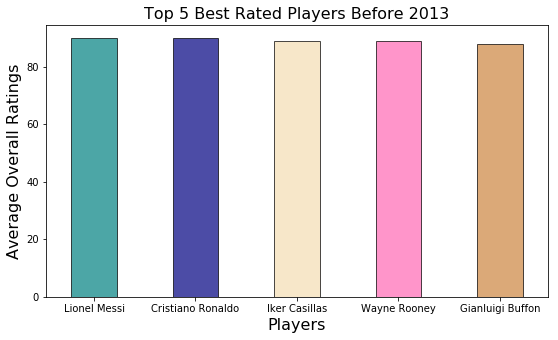

In [135]:
#Plotting the above results
plt.figure(figsize=(9,5))
be4_2013.plot(kind = ('bar'), color=['teal', 'navy', 
    'wheat', 'hotpink', 'peru'],edgecolor = 'black',  width=0.45, alpha = 0.7)
sns.set_style("whitegrid")

#Titles and labels
plt.title('Top 5 Best Rated Players Before 2013', fontsize = 16)
plt.xlabel('Players', fontsize = 16)
plt.xticks(rotation= 0)
plt.ylabel('Average Overall Ratings', fontsize = 16);
plt.show()

>The result shows the top 5 best players in European League before the year 2013. **Cristiano Ronaldo** and **Lionel Messi** led this table having the same average rating during this time frame.

### 2. What are the attributes of the lowest overall rated player?


In [136]:
df_player_ed.min().overall_rating

33.0

In [137]:
df_player_ed.query('overall_rating == 33.0')

,id,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
56661,3464,41841,Francesco Della Rocca,1987-09-14,182.88,161,2007-02-22,33.0,53.0,right,...,49.0,30.0,20.0,23.0,22.0,4.0,20.0,28.0,20.0,20.0
56660,3464,41841,Francesco Della Rocca,1987-09-14,182.88,161,2007-08-30,33.0,53.0,right,...,49.0,30.0,20.0,23.0,22.0,4.0,20.0,28.0,20.0,20.0


We have two rows with the same values. we have to drop one


In [138]:
df_player_ed.drop(index=56660, inplace = True);

In [139]:
df_min = df_player_ed.query('overall_rating == 33.0')

In [140]:
df_min.head()

,id,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
56661,3464,41841,Francesco Della Rocca,1987-09-14,182.88,161,2007-02-22,33.0,53.0,right,...,49.0,30.0,20.0,23.0,22.0,4.0,20.0,28.0,20.0,20.0


Now, we will plot some of the attributes of Francesco Della Rocca

In [141]:
# Getting attributes i want to plot
# Also, changing the data type to int
df_low =  df_min.loc[:,'crossing':'vision'].max().astype('int')

df_low

crossing              28
finishing             39
heading_accuracy      39
short_passing         29
volleys               49
dribbling             30
curve                 57
free_kick_accuracy    48
long_passing          28
ball_control          47
acceleration          51
sprint_speed          59
agility               66
reactions             61
balance               69
shot_power            28
jumping               59
stamina               28
strength              32
long_shots            43
aggression            29
interceptions         28
positioning           40
vision                49
dtype: int64

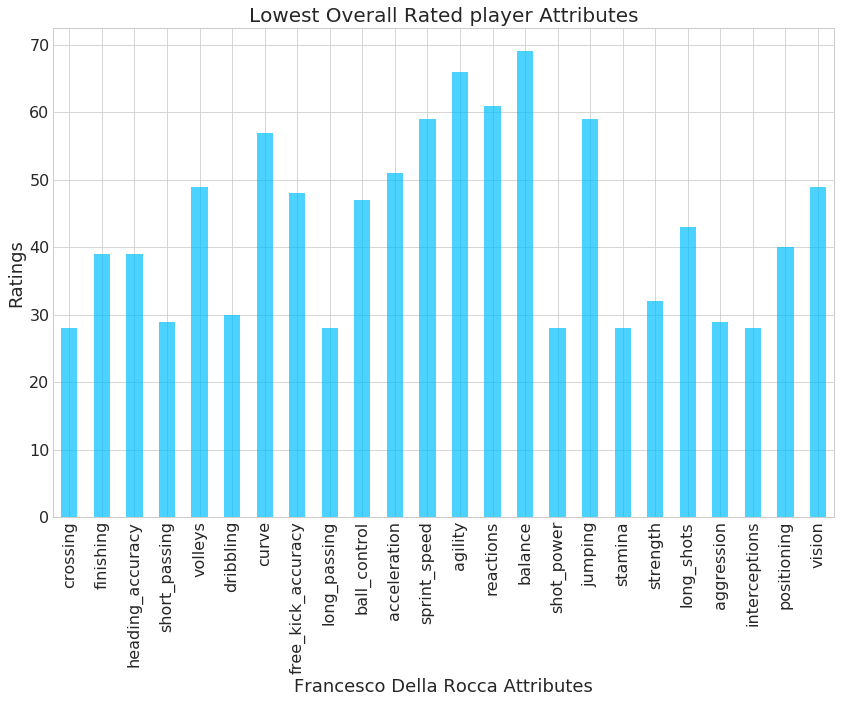

In [142]:
width = 0.4
df_low.plot( width = 0.5, kind= 'bar', alpha = 0.7, figsize = (14,
                                        9),color = 'deepskyblue');
sns.set_style("whitegrid")

# title and labels
plt.ylabel('Ratings', fontsize = 18)
plt.yticks(fontsize = 16);
plt.xlabel('Francesco Della Rocca Attributes', fontsize = 18);
plt.title('Lowest Overall Rated player Attributes', fontsize = 20);
plt.xticks(fontsize = 16);


> The resuld shows Francesco Della Rocca attritutes. who was the lowest **Overall Rated Player** in the European soccer league

### 3. Which league has the highest home goals from 2010 to 2016?

In [143]:
#sorting matxh dataframe by date in ascending order
df_match_ed2 = df_match_ed.sort_values('date', ascending= True)

#creating new table from 2010 to 2016  
df_match_ed2 = df_match_ed2.query('date >= "2010-01-01"')

df_match_ed2.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,start_season,end_season,country_name,league_name
19984,19985,19694,19,2010-01-02,658910,9800,8597,1,0,2009,2010,Scotland,Scotland Premier League
21973,21974,21518,16,2010-01-02,684824,10267,8558,1,0,2009,2010,Spain,Spain LIGA BBVA
19986,19987,19694,19,2010-01-02,658912,9938,8485,0,1,2009,2010,Scotland,Scotland Premier League
21971,21972,21518,16,2010-01-02,684821,8634,10205,1,1,2009,2010,Spain,Spain LIGA BBVA
21969,21970,21518,16,2010-01-02,684817,9906,8302,2,1,2009,2010,Spain,Spain LIGA BBVA


In [144]:
# Setting the plot variable
home_goal = df_match_ed2.groupby('league_name')['home_team_goal'].sum(
                        ).sort_values(ascending=False)

home_goal

league_name
Spain LIGA BBVA             4088
England Premier League      3841
Italy Serie A               3706
Netherlands Eredivisie      3569
France Ligue 1              3514
Germany 1. Bundesliga       3240
Portugal Liga ZON Sagres    2442
Poland Ekstraklasa          2182
Scotland Premier League     2159
Belgium Jupiler League      2067
Switzerland Super League    1868
Name: home_team_goal, dtype: int64

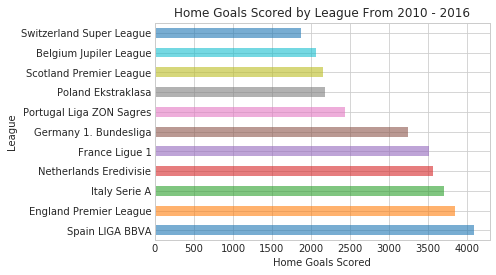

In [145]:
# plot bars
home_goal.plot(width = 0.5, kind = 'Barh', alpha = 0.6)

#titles and lebels
plt.ylabel('League')
plt.xlabel('Home Goals Scored')
plt.title('Home Goals Scored by League From 2010 - 2016');

>The plot depicts that **Spain Leaugue** have scored more goals at Home (`4088 goals`) than any other European League from 2010 to 2016

### 4. How are team attributes correlated to one another?

Checking the relationship between various team attributes

In [146]:
df_team_ed.head()

,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,2010-02-22,45,Balanced,Little,45,Mixed,Organised,50,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,2011-02-22,66,Balanced,Little,52,Mixed,Organised,65,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,2012-02-22,53,Balanced,Little,55,Mixed,Organised,55,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,2013-09-20,58,Balanced,Little,38,Mixed,Organised,67,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,KRC Genk,2014-09-19,58,Balanced,Normal,38,Mixed,Organised,67,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [147]:
# Relationship analysis

relation_1 = df_team_ed.iloc[:,3:24]
relation = relation_1.corr()
relation.head()

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
buildUpPlaySpeed,1.000000,0.395506,0.319162,0.191687,0.072098,0.046397,0.160569,0.067019
buildUpPlayPassing,0.395506,1.000000,0.220367,0.231088,-0.077325,-0.050487,0.122451,0.063150
chanceCreationPassing,0.319162,0.220367,1.000000,0.246528,0.112497,0.203158,0.145212,0.150143
chanceCreationCrossing,0.191687,0.231088,0.246528,1.000000,-0.012576,0.087108,0.098874,0.131515
chanceCreationShooting,0.072098,-0.077325,0.112497,-0.012576,1.000000,0.185603,0.116578,0.129166


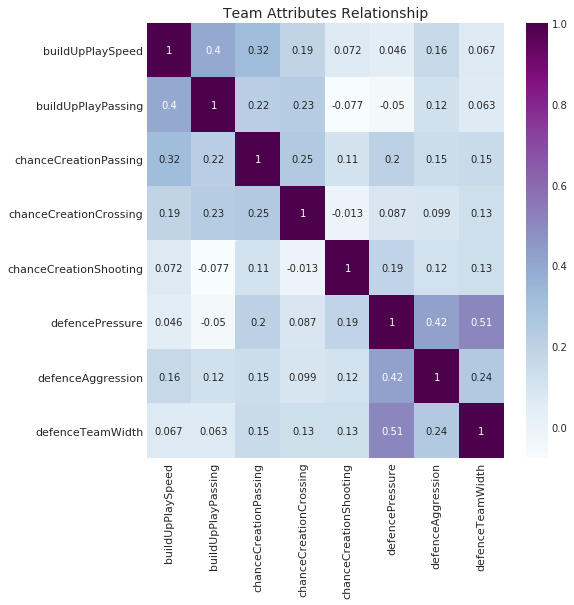

In [148]:
#plotting relationship analysis with heatmap
plt.figure(figsize= (8,8));


bes = sns.heatmap(relation, xticklabels = relation.columns, yticklabels 
    = relation.columns, annot= True, cmap= 'BuPu');

bes.set_yticklabels(bes.get_ymajorticklabels(), fontsize = 11);
bes.set_xticklabels(bes.get_xmajorticklabels(), fontsize = 11);

plt.title('Team Attributes Relationship', fontsize = 14);

> The Heatmap above dipicts the relationships between vatious team attributes. It shouws that team deense width corrolates better with defense pressure. 

>It also show that majority of team attributes correlates positively with one another. 

### 5. Which player foot has the highest average freekick accuracy and shot power?

Getting the mean of Freekick Accuracy and Shot Power by preferred foot.



In [149]:
# Getting the mean

fk_sp = df_player_ed.groupby('preferred_foot')['free_kick_accuracy', 'shot_power'].mean()

fk_sp

,free_kick_accuracy,shot_power
preferred_foot,,
left,53.291360,63.491101
right,48.130705,61.340781


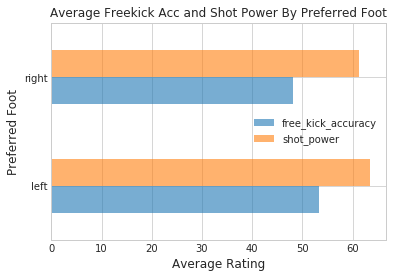

In [150]:
# Plotting the results
fk_sp.plot.barh(width = 0.5, alpha = 0.6)

#titles and lebels
plt.ylabel('Preferred Foot', fontsize = 12)
plt.xlabel('Average Rating', fontsize = 12)
plt.title('Average Freekick Acc and Shot Power By Preferred Foot', fontsize = 12);


>These Chart shows that players with **Left Foot** have better Free Kick Accuracy and Shot Power compared to the **Right Foot** 

<a id='limitations'></a>
## Limitations


1. Duplicate Rows: some row seams to be duplicates but have different id and date. apart from that all values were the same.

2. Data types: majority of the datatypes for numerical values that are whole numbers were floats had to change the data types


3. Missing Values: There were alot of missing values. i had to drom some columns and rows which would have made my analysis better

4. Dropped Columns: insignificant columns that were not needed for this analysis were dropped

<a id='conclusions'></a>
## Conclusions
>1. Cristiano Ronaldo and Lionel Messi and the top 2 best player at the end of 2012.
2. The lowest rated player in the European league was Francesco Della Rocca with overall rating of 33
3. From 2010 to 2016, the Spain LIGA BBVA scored 4088 home goals. Which is the highest home goals scored compared to other European leagues
4. Majority of the team attributes dipicts positive correlation with one another.
5. Left fotted players have better shot power and free kick accuracy than rightfooted players.
